In [8]:
import zipfile 
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
zip_file = zipfile.ZipFile("/content/drive/MyDrive/NLP_Vol1/UPDATED_NLP_COURSE.zip","r")
zip_file.extractall()
zip_file.close()

In [12]:
df = pd.read_csv("/content/UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv",sep="\t")
print(f"Shape : {df.shape}")
print()
df.head()

Shape : (5572, 4)



,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [11]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [17]:
df["label"].unique()

array(['ham', 'spam'], dtype=object)

In [18]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [19]:
df[["length","punct"]].describe().T

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.489950,59.942907,2.0,36.0,62.0,122.0,910.0
punct,5572.0,4.177495,4.623919,0.0,2.0,3.0,6.0,133.0


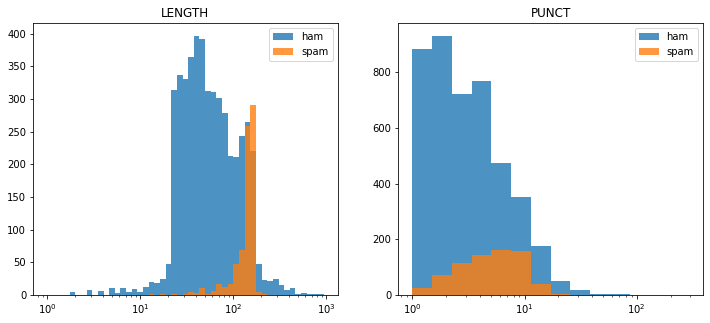

In [29]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.xscale("log")
bins = 1.15**(np.arange(0,50))
plt.hist(df[df["label"] == "ham"]["length"], bins = bins, alpha = 0.8)
plt.hist(df[df["label"] == "spam"]["length"], bins = bins, alpha = 0.8)
plt.legend(("ham","spam"))
plt.title("LENGTH")

plt.subplot(1,2,2)
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.title("PUNCT")

plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [32]:
X = df[["length","punct"]]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3900, 2), (1672, 2), (3900,), (1672,))

In [35]:
lr_model = LogisticRegression(solver = "lbfgs")

In [36]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [38]:
predictions = lr_model.predict(X_test)

In [43]:
pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ["ham","spam"],columns = ["ham","spam"])

,ham,spam
ham,1404,44
spam,219,5


In [44]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [48]:
print("Accuracy : ", metrics.accuracy_score(y_test,predictions).round(2))

Accuracy :  0.84


In [53]:
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)

predictions = nb_model.predict(X_test)

print("Accuracy : ", metrics.accuracy_score(y_test,predictions).round(2))
print()
pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ["ham","spam"],columns = ["ham","spam"])

Accuracy :  0.86



,ham,spam
ham,1438,10
spam,224,0


In [54]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [57]:
svc_model = SVC(gamma = "auto")
svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(y_test,predictions).round(2))
print()
pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ["ham","spam"],columns = ["ham","spam"])

Accuracy :  0.88



,ham,spam
ham,1373,75
spam,121,103


In [58]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



# Text Feature Extraction

In [77]:
vocab = {}
i = 1

with open("/content/UPDATED_NLP_COURSE/03-Text-Classification/1.txt") as f:

    x = f.read().lower().split()

for word in x:

    if word in vocab:
        continue
    else:
        vocab[word] = i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


In [78]:
with open("/content/UPDATED_NLP_COURSE/03-Text-Classification/2.txt") as f:

    x = f.read().lower().split()

for word in x:

    if word in vocab:
        continue
    else:
        vocab[word] = i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12, 'surfing': 13, 'catching': 14, 'waves': 15, 'fun': 16, 'popular': 17, 'water': 18, 'sport': 19}


In [83]:
one = ["1.txt"] + [0]*len(vocab)
one

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [84]:
with open("/content/UPDATED_NLP_COURSE/03-Text-Classification/1.txt") as f:
    x = f.read().lower().split()

for word in x:
    one[vocab[word]]+=1

one

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [86]:
two = ["2.text"] + [0]*len(vocab)

with open("/content/UPDATED_NLP_COURSE/03-Text-Classification/2.txt") as f:
    x = f.read().lower().split()

for word in x:
    two[vocab[word]]+=1

two

['2.text', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]

In [90]:
one,two

(['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 ['2.text', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1])

In [91]:
df = pd.read_csv("/content/UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv",sep = "\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

X = df["message"]
y = df["label"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [94]:
count_vect = CountVectorizer()

In [97]:
X_train_counts = count_vect.fit_transform(X_train)

In [101]:
X_train.shape,X_train_counts.shape

((3733,), (3733, 7082))

In [104]:
tfidf_transoformer = TfidfVectorizer()
X_train_tfidf = tfidf_transoformer.fit_transform(X_train)
X_train.shape, X_train_tfidf.shape

((3733,), (3733, 7082))

In [111]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [106]:
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [108]:
text_clf = Pipeline([("tfidf",TfidfVectorizer()),
                     ("clf",LinearSVC())])

In [109]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [110]:
predictions = text_clf.predict(X_test)

In [112]:
print(metrics.confusion_matrix(y_test, predictions))

[[1586    7]
 [  12  234]]


In [113]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [115]:
print("Accuracy : ",metrics.accuracy_score(y_test, predictions).round(2))

Accuracy :  0.99


In [116]:
text_clf.predict(["Hi how are you doing today ? "])

array(['ham'], dtype=object)

In [117]:
text_clf.predict(["Congratulations! You've been selected as a winner. TEXT WON to 41231 congratulations frees money..."])

array(['spam'], dtype=object)

# Project

In [119]:
df = pd.read_csv("/content/UPDATED_NLP_COURSE/TextFiles/moviereviews.tsv",sep = "\t")
print(f"Shape : {df.shape}")

Shape : (2000, 2)


In [121]:
df.isnull().sum().sum()

35

In [122]:
df.dropna(inplace = True)
df.isnull().sum().sum()

0

In [124]:
for i in df.itertuples():
    print(i)
    break

Pandas(Index=0, label='neg', review='how do films like mouse hunt get into theatres ? \r\nisn\'t there a law or something ? \r\nthis diabolical load of claptrap from steven speilberg\'s dreamworks studio is hollywood family fare at its deadly worst . \r\nmouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . \r\nwriter adam rifkin and director gore verbinski are the names chiefly responsible for this swill . \r\nthe plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . \r\ndeciding to check out the long-abandoned house , they soon learn that it\'s worth a fortune and set about selling it in auction to the highest bidder . \r\nbut battling them at every turn is a very smart mouse , happy with his run-down little abode a

In [127]:
mystring = "hello how are you ?"
empty = " "
mystring.isspace(),empty.isspace()

(False, True)

In [128]:
blanks = []
for i , lb, rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)

In [129]:
df.drop(blanks,inplace = True)
print(f"Shape : {df.shape}")

Shape : (1938, 2)


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics

In [131]:
X = df["review"]
y = df["label"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [136]:
text_clf = Pipeline([("tfidf",TfidfVectorizer()),
                     ("clf",LinearSVC())])

In [137]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [138]:
predictions = text_clf.predict(X_test)

In [139]:
print(metrics.confusion_matrix(y_test, predictions))

[[259  49]
 [ 49 283]]


In [143]:
print("Accuracy : ", metrics.accuracy_score(y_test, predictions).round(2))

Accuracy :  0.85


In [142]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640

